# Climate Change and Impacts in Africa

According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.

You work for a Non-governmental organization tasked with reporting the state of climate change in Africa at the upcoming African Union Summit. The head of analytics has provided you with [IEA-EDGAR CO2 dataset](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117) which you will clean, combine and analyze to create a report on the state of climate change in Africa. You will also provide insights on the impact of climate change on African regions (with four countries, one from each African region, as case studies). 

## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **You can download the dataset from your workspace or inspect the dataset directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

## Instructions

The head of analytics in your organization has specifically asked you to do the following:


1. Clean and tidy the datasets. 
2. Create a line plot to show the trend of `CO2` levels across the African regions.
3. Determine the relationship between time (`Year`) and `CO2` levels across the African regions.
4. Determine if there is a significant difference in the `CO2` levels among the African Regions.
5. Determine the most common (top 5) industries in each African region.
6. Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
7. Predict the `CO2` levels (at each African region) in the year 2025.
8. Determine if `CO2` levels affect annual `temperature` in the selected African countries.


## IMPORTANT

- Make a copy of this workspace.

- Write your code within the cells provided for you. Each of those cells contain the comment "`#Your code here`".

- Next, run the cells containing the checks. **We've asked you not to modify these cells**. To pass a check, make sure you create the variables mentioned in the instruction tasks. They (the variables) will be verified for correctness; if the cell outputs nothing your solution passes else the cell will throw an error. We included messages to help you fix these errors. 

- If you're stuck (even after reviewing related DataCamp courses), then uncomment and run the cell which contains the source code of the solution. For example, `print(inspect.getsource(solutions.solution_one))` will display the solution for instruction 1. **We advise you to only look at the solution to your current problem.**

- Note that workspaces created inside the "I4G 23/24" group are always private to the group and cannot be made public.

- If after completion you want to showcase your work on your DataCamp portfolio, use "File > Make a copy" to copy over the workspace to your personal account. Then make it public so it shows up on your DataCamp portfolio.

- We hope you enjoy working on this project as we enjoyed creating it. Cheers!

In [1]:
# Setup
import pandas as pd
import numpy as np
import pingouin
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import inspect
from scipy.stats import spearmanr

plt.style.use('ggplot')
# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# we need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')

totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')


# Read the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
# Tunisia:    North Africa
# Mozambique: South Africa
temperatures = pd.read_csv('temperatures.csv')

In [2]:
# The solution code and the test runner
import tests as runner
import solutions

## Instruction 1: Clean and tidy the datasets

### Tasks

- Rename `C_group_IM24_sh` to `Region`, `Country_code_A3` to `Code`, and `ipcc_code_2006_for_standard_report_name` to `Industry` in the corresponding African datasets.
- Drop `IPCC_annex`, `ipcc_code_2006_for_standard_report`, and `Substance` from the corresponding datasets.
- Melt `Y_1970` to `Y_2021` into a two columns `Year` and `CO2`. Drop rows where `CO2` is missing.
- Convert `Year` to `int` type.

### Hints

- Use `df.rename()` method to rename columns.
- The `df.drop()` method can be used to drop columns.
- You might find `df.melt()` or `pd.melt()` useful.
- The `df.column.astype(int)` can be used to convert to a column to an integer type.

In [3]:
# checking dataset rows

ipcc_2006_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,Y_1989,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
42,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.2,Manufacturing Industries and Construction,CO2,bio,468.101210,468.101210,469.301150,471.101470,473.501350,476.601250,480.001350,484.201130,489.001300,493.801470,498.601210,503.101190,507.601160,512.201200,517.001360,521.901170,526.901470,532.301180,538.001090,544.601170,552.001330,615.253250,567.001380,531.838190,556.223510,636.956950,605.186400,624.371710,651.849890,653.749860,664.842440,676.534980,680.035150,683.735020,674.545940,678.146170,775.268740,825.231850,849.517100,839.431800,846.532190,862.324450,878.017490,876.424760,694.984348,628.393538,716.208742,745.933600,790.238440,796.965524,806.888450,835.471254
43,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.4,Residential and other sectors,CO2,bio,9803.605447,9803.605447,9856.754530,9929.203032,10030.351017,10160.498759,10301.945770,10473.542238,10671.238252,10873.034335,11070.930479,11257.476684,11449.072937,11640.019473,11837.215117,12040.811150,12245.507023,12467.352793,12710.747951,12983.342464,13287.286414,13595.930453,13913.823860,14237.417597,14513.014646,14689.257660,14870.896908,15014.587900,15155.978474,15301.919333,15469.209459,15660.949552,15867.189824,16027.035971,16186.482266,16341.128832,16640.372077,16940.815201,17241.658215,17544.701810,17848.844864,18153.687909,18457.831374,18758.674388,19052.717572,19338.111419,19616.705006,19909.315374,20177.076755,20441.554365,20904.334177,20904.334177
44,Non-Annex_I,Southern_Africa,AGO,Angola,1.B.1,Solid Fuels,CO2,bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Non-Annex_I,Southern_Africa,AGO,Angola,3.C.1,Emissions from biomass burning,CO2,bio,1168.997514,1149.912236,1146.276608,1188.270013,1098.717746,1098.672779,1101.969422,1005.182967,1011.234997,915.818990,949.744370,872.287869,868.832441,890.351350,899.461328,912.785112,1037.186584,1077.998947,1056.754802,1006.037000,887.898103,1034.262216,1123.959976,1144.701237,1150.119628,1087.997316,1181.117058,1156.381580,1364.672739,1264.756268,1355.780920,1552.396976,1741.116732,1884.592690,2111.105381,2329.745611,2202.679384,2477.831538,2087.565334,2949.073913,3101.364647,3574.520152,2224.584701,3824.749751,3521.645794,3651.157894,4482.919263,4500.168653,4686.371296,4779.221426,4386.060462,4085.260834
46,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.1.a,Main Activity Electricity and Heat Production,CO2,fossil,137.584287,137.584287,159.267651,168.796307,371.818686,352.955852,346.538807,346.538807,346.538807,386.988094,399.822184,399.822184,421.991080,459.522902,117.356874,160.917764,204.478337,173.363552,260.485008,244.927616,291.599792,244.927616,172.586962,125.235417,175.019198,171.907594,197.090547,416.629678,385.126281,621.107697,728.548262,820.624961,820.624961,1027.529371,653.290455,767.438503,868.947243,976.775149,1385.920126,2226.378347,2369.112639,2229.586869,2699.129471,3993.658132,5669.710708,6130.962446,4198.262959,4071.508850,4016.468964,4612.129507,4304.458056,4687.903324


In [4]:
# checking dataset rows

totals_by_country_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,Y_1989,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,22666.196272,19201.301175,24020.700414,26410.708507,26487.027464,26861.308092,25888.633268,25620.805568,26293.854273,26643.647803,27616.242673,28099.085662,28632.242976,29310.776810,29702.183130,26025.382685,27096.481653,27801.150922,28127.608325,27787.676875,29453.900602,32430.325983,33295.920830,34310.556491,35354.810082,34104.669590,34184.397138,34324.976979,36045.571750,36788.078823,35325.283451,36353.193475,37491.020928,39679.774031,42655.564104,44770.499444,46455.168480,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
14,Non-Annex_I,Eastern_Africa,BDI,Burundi,CO2,4385.562636,4252.930585,4363.612720,4358.525092,4369.160007,4488.276934,4539.717900,4626.132886,4772.893954,4895.565393,5037.523017,5127.364278,5347.804182,5519.523388,5691.476172,5820.471640,6054.836981,6305.044979,6589.079942,6818.745162,7771.771328,8006.900690,8056.252748,8258.867228,8446.275200,8867.914465,9113.428876,9225.789694,9587.753006,7144.496683,7403.975407,10248.011408,10452.420002,10668.265339,10909.182644,11050.134198,11173.208119,11626.417336,11691.329542,11977.183580,12346.667414,12622.895513,8459.288013,9149.054624,9159.419598,9266.117147,9566.111424,9682.155915,9978.899053,10259.091787,10117.781634,10195.577902
16,Non-Annex_I,Western_Africa,BEN,Benin,CO2,4318.786819,4331.965113,4520.457422,4610.356288,4687.945024,4813.954152,4710.153696,4882.043721,5087.592911,5224.267501,5310.929795,5353.470327,5531.860143,5651.180582,5840.280569,6083.683627,6135.089827,6168.653966,6357.523926,6453.559167,6584.523814,6705.170088,6879.178587,7051.875783,7202.702923,7378.033927,8681.397288,9000.074667,8780.116883,8710.368254,7310.880172,7754.767109,8290.703718,8618.359432,8970.188838,9409.451456,11064.330305,11842.515661,12107.991804,12697.538321,12280.167241,12330.344538,12358.663172,13531.050710,14190.811414,14756.624395,16399.517824,16772.596446,18298.343482,18596.362918,18428.166791,19018.648794
17,Non-Annex_I,Western_Africa,BFA,Burkina Faso,CO2,8158.106987,8168.513580,8287.030827,8459.268901,8556.373860,8805.602954,8771.463061,9065.529375,9208.066952,9262.538023,9428.059967,9642.477222,9644.430926,9842.659717,10047.268997,10251.757097,10617.709012,10966.259470,11307.673774,11448.081768,12913.394412,13335.090556,13726.449311,14003.397846,14149.296093,14623.770584,14669.864637,15003.823330,15222.522701,11103.823354,11255.343077,12244.734345,10758.856767,11319.951107,13225.839940,16644.993530,17203.709903,18281.857291,20307.795794,20447.979487,21030.497507,21075.295912,22910.057888,23772.638294,23681.040829,25167.623449,25915.830695,26939.500315,28175.585069,28984.431716,29300.234771,29548.239352
31,Non-Annex_I,Southern_Africa,BWA,Botswana,CO2,947.246888,1023.689503,971.345976,1047.179577,1331.197530,1449.426514,1776.361561,1884.603895,1969.127456,2103.674206,2317.705316,3180.822144,3183.048634,3201.553149,3253.899795,3453.791239,3758.004617,3791.886933,4613.107485,4844.358346,4985.079424,5008.564530,5697.304825,5771.647047,5804.749142,5847.173969,5615.316415,5747.130499,6248.606278,6657.247838,6731.682240,6661.913642,6843.946487,6671.288531,6466.724383,6757.406872,6612.827689,6760.570293,6835.866785,6616.708927,5755.862895,6343.133195,5696.663997,7668.026698,9295.462092,9170.933436,8868.575860,9533.137111,9601.783432,9460.722213,8927.915806,9239.451125


In [5]:
# checking the dataset

ipcc_2006_africa.describe()

,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,Y_1989,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
count,822.000000,825.000000,826.000000,836.000000,865.000000,873.000000,877.000000,8.550000e+02,909.000000,9.080000e+02,915.000000,9.180000e+02,8.910000e+02,8.980000e+02,9.220000e+02,9.100000e+02,9.100000e+02,9.080000e+02,8.750000e+02,8.720000e+02,8.820000e+02,874.000000,8.770000e+02,8.810000e+02,8.840000e+02,8.920000e+02,9.010000e+02,9.010000e+02,8.940000e+02,8.700000e+02,8.720000e+02,8.720000e+02,8.990000e+02,9.030000e+02,9.490000e+02,9.520000e+02,9.600000e+02,917.000000,925.000000,931.000000,914.000000,919.000000,922.000000,935.000000,935.000000,928.000000,928.000000,928.000000,922.000000,920.000000,920.000000,919.000000
mean,1086.002542,1092.153918,1140.174195,1196.403674,1200.332083,1194.887000,1252.974399,1.298442e+03,1224.870316,1.286319e+03,1308.606267,1.322084e+03,1.382669e+03,1.398415e+03,1.414576e+03,1.482305e+03,1.512981e+03,1.557540e+03,1.664742e+03,1.702698e+03,1.733532e+03,1784.151747,1.807043e+03,1.811344e+03,1.863236e+03,1.918679e+03,1.983649e+03,2.025892e+03,2.085366e+03,2.171384e+03,2.206204e+03,2.259908e+03,2.245789e+03,2.318208e+03,2.293545e+03,2.376789e+03,2.399544e+03,2556.911167,2624.176130,2620.748160,2747.681669,2771.445684,2866.138342,2919.341008,2996.069672,3022.587198,3079.033563,3149.523052,3222.728291,3283.659619,3177.468575,3266.228502
std,5937.852642,5949.113559,6216.062460,6589.145051,6847.127609,6862.581856,7249.172402,7.390470e+03,6949.555262,7.443636e+03,7541.300128,7.662651e+03,7.927954e+03,8.055705e+03,8.291323e+03,8.574863e+03,8.719139e+03,9.084183e+03,9.402099e+03,9.616838e+03,1.001674e+04,10175.815311,1.034627e+04,1.059758e+04,1.091496e+04,1.125924e+04,1.162629e+04,1.194375e+04,1.230530e+04,1.248874e+04,1.282792e+04,1.285206e+04,1.295667e+04,1.352016e+04,1.370578e+04,1.393782e+04,1.416604e+04,14948.283145,15589.374408,15480.896697,16204.722990,16334.247624,16902.140234,17122.463532,17690.690441,17717.936488,18044.956373,18278.093615,18541.360084,18886.047950,18678.290674,18768.690272
min,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,5.389199e-07,0.000001,9.966931e-07,0.000001,1.872167e-07,1.375762e-07,1.562384e-07,8.478186e-08,1.246223e-07,1.579475e-07,8.053256e-07,6.444121e-07,4.746806e-07,3.195958e-07,0.000001,9.046649e-07,8.880218e-07,8.300000e-07,9.089394e-07,8.991466e-07,9.277301e-07,5.900649e-07,6.939140e-07,7.446719e-07,5.475438e-07,5.441030e-07,8.767960e-07,7.006928e-07,2.997758e-07,3.613917e-07,0.000004,0.000015,0.000004,0.000020,0.000022,0.000024,0.000007,0.000026,0.000025,0.000025,0.000024,0.000024,0.000023,0.000023,0.000022
25%,2.152257,2.255498,2.251031,2.311148,1.446005,1.728571,2.613095,3.286399e+00,1.497919,1.555519e+00,1.626716,1.395307e+00,1.699823e+00,1.609299e+00,1.373770e+00,1.712086e+00,1.953929e+00,1.863287e+00,3.690875e+00,3.372266e+00,3.422763e+00,3.972718,3.613316e+00,3.392000e+00,3.686279e+00,3.302705e+00,3.717132e+00,4.056230e+00,4.232528e+00,6.230918e+00,6.067118e+00,5.803826e+00,4.344811e+00,3.797828e+00,2.984523e+00,3.077465e+00,3.137614e+00,4.980000,5.091476,4.780077,7.816168,7.099834,8.427210,8.397345,8.713037,8.581459,8.094374,8.447578,9.198981,9.956712,8.647050,8.800709
50%,34.221745,34.795760,35.067192,35.750461,31.838095,32.243708,38.502256,4.400000e+01,35.414451,3.822228e+01,41.176867,4.171078e+01,4.444652e+01,4.211548e+01,3.726166e+01,4.050579e+01,4.163459e+01,4.736782e+01,5.084626e+01,5.095789e+01,4.698111e+01,50.728875,4.875000e+01,4.855859e+01,5.241287e+01,5.091809e+01,5.516347e+01,5.768956e+01,6.226180e+01,7.324241e+01,7.419422e+01,7.822340e+01,7.453767e+01,7.745091e+01,6.585772e+01,6.625352e+01,7.351789e+01,86.580090,82.797711,83.544000,97.227154,88.500000,98.580827,9

In [6]:
# checking the dataset

totals_by_country_africa.describe()

,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,Y_1989,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,15940.965883,16089.767541,16817.569377,17860.597698,18540.843781,18627.434838,19622.474072,19824.429185,19882.269950,20856.739596,21381.691679,21672.731565,21999.257340,22424.580310,23289.989055,24087.457835,24585.942909,25254.397954,26011.586453,26513.442635,27303.126358,27845.511193,28299.586964,28496.321226,29412.505947,30561.816824,31915.491601,32595.159656,33291.375448,33733.996279,34353.752475,35190.000504,36052.935327,37381.104676,38867.395742,40405.418403,41135.037373,41869.420355,43345.766438,43569.938155,44846.090096,45481.403274,47188.920566,48742.568608,50023.663270,50088.587849,51023.984755,52192.096291,53059.919356,53945.836601,52201.269439,53601.142731
std,38426.152131,39452.623019,41458.711228,44147.351203,47056.353993,47489.213224,50097.135987,49810.960797,48133.890025,51466.227869,52600.425005,53665.404235,54206.330447,54488.434230,57350.610926,58743.936484,59111.419055,61236.070464,62893.555119,63510.135256,65084.770710,65297.600572,65027.975597,65560.540097,67082.495745,69586.510259,73756.920093,75743.771628,76675.583516,75505.696281,77782.525096,79350.654971,80988.124604,84523.406376,88052.181624,90591.070175,91033.055349,93909.359948,98035.041768,95386.548976,98265.886484,99011.867520,102816.097836,105587.346425,107447.575862,105432.788909,106925.919622,109378.536571,110529.548471,111613.786383,107691.674342,109482.329808
min,2.762887,2.762890,2.233651,2.490629,2.657657,2.311542,1.835306,3.363197,2.840054,3.007004,3.227920,2.063053,1.825611,2.954977,2.635363,2.934254,3.253112,4.573075,5.118348,5.201655,9.531432,5.434492,5.162470,6.452213,5.556340,5.837345,3.493033,3.827534,3.831815,4.097132,11.225717,7.509044,7.526857,7.985771,9.090511,9.704177,8.524115,9.916424,10.374405,10.596093,11.486420,12.005532,12.186497,14.869719,14.844374,14.961687,15.656741,16.351794,17.194073,16.909453,15.572638,16.101619
25%,2192.344511,2207.740101,2248.409344,2247.181637,2251.619953,2341.078976,2354.277939,2485.655667,2586.376022,2663.098972,2732.799228,2830.679660,2864.021760,2893.481565,2941.333517,3015.019840,3107.333721,3221.245625,3355.361830,3364.964580,3521.983373,3808.305985,3984.868843,3778.081388,3776.959027,3884.575987,3907.412504,4008.189733,3484.872253,3469.723741,3238.420410,3897.670288,3824.429784,3869.214413,3952.541347,4016.983530,4171.237342,4424.010242,4687.642900,4784.047674,4808.837034,4882.461655,5303.941433,5233.201816,5493.231594,5711.767441,5592.074975,5620.551098,5565.678985,5563.563119,5350.465396,5503.831373
50%,4571.307411,4570.737536,4740.616792,5645.459022,5863.246316,5830.150090,6013.628057,5907.334897,6095.595158,5734.275824,5708.396586,5834.476240,5944.684989,6077.030680,6164.436393,6271.369034,6493.358254,6657.581037,6838.236043,6913.429697,7541.988214,7773.171830,8046.058055,8197.178349,8224.776780,7957.213636,8638.934906,9215.637970,9348.560049,9296.468126,7850.860435,8630.660578,8807.971409,9138.338276,9372.614483,9913.815441,10754.658892,11251.414367,11477.218275,12337.360950,12313.417328,12476.620025,12634.038824,13395.244054,13809.399245,14392.507252,15426.427460,15405.634852,15958.570208,17318.221870,17466

In [7]:
# checking dataframe shapes

print('The shape of the ipcc_2006_africa dataframe is', ipcc_2006_africa.shape,'\n')
print('The shape of the totals_by_country_africa dataframe is', totals_by_country_africa.shape,'\n')

The shape of the ipcc_2006_africa dataframe is (1158, 60) 

The shape of the totals_by_country_africa dataframe is (56, 57) 



In [8]:
# checking columns before renaming

print('The ipcc_2006_africa dataframe has these columns', ipcc_2006_africa.columns, '\n')
print('The totals_by_country_africa dataframe has these columns', totals_by_country_africa.columns,'\n')

The ipcc_2006_africa dataframe has these columns Index(['IPCC_annex', 'C_group_IM24_sh', 'Country_code_A3', 'Name',
       'ipcc_code_2006_for_standard_report',
       'ipcc_code_2006_for_standard_report_name', 'Substance', 'fossil_bio',
       'Y_1970', 'Y_1971', 'Y_1972', 'Y_1973', 'Y_1974', 'Y_1975', 'Y_1976',
       'Y_1977', 'Y_1978', 'Y_1979', 'Y_1980', 'Y_1981', 'Y_1982', 'Y_1983',
       'Y_1984', 'Y_1985', 'Y_1986', 'Y_1987', 'Y_1988', 'Y_1989', 'Y_1990',
       'Y_1991', 'Y_1992', 'Y_1993', 'Y_1994', 'Y_1995', 'Y_1996', 'Y_1997',
       'Y_1998', 'Y_1999', 'Y_2000', 'Y_2001', 'Y_2002', 'Y_2003', 'Y_2004',
       'Y_2005', 'Y_2006', 'Y_2007', 'Y_2008', 'Y_2009', 'Y_2010', 'Y_2011',
       'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015', 'Y_2016', 'Y_2017', 'Y_2018',
       'Y_2019', 'Y_2020', 'Y_2021'],
      dtype='object') 

The totals_by_country_africa dataframe has these columns Index(['IPCC_annex', 'C_group_IM24_sh', 'Country_code_A3', 'Name', 'Substance',
       'Y_1970', 'Y_1971

In [9]:
# rename the columns
ipcc_2006_africa.rename(columns={'C_group_IM24_sh': 'Region', 'Country_code_A3': 'Code', 'ipcc_code_2006_for_standard_report_name':'Industry'}, inplace=True)
totals_by_country_africa.rename(columns={'C_group_IM24_sh': 'Region', 'Country_code_A3': 'Code'}, inplace=True)


In [10]:
# checking columns after renaming

print('The ipcc_2006_africa dataframe has these columns', ipcc_2006_africa.columns, '\n')
print('The totals_by_country_africa dataframe has these columns', totals_by_country_africa.columns,'\n')

The ipcc_2006_africa dataframe has these columns Index(['IPCC_annex', 'Region', 'Code', 'Name',
       'ipcc_code_2006_for_standard_report', 'Industry', 'Substance',
       'fossil_bio', 'Y_1970', 'Y_1971', 'Y_1972', 'Y_1973', 'Y_1974',
       'Y_1975', 'Y_1976', 'Y_1977', 'Y_1978', 'Y_1979', 'Y_1980', 'Y_1981',
       'Y_1982', 'Y_1983', 'Y_1984', 'Y_1985', 'Y_1986', 'Y_1987', 'Y_1988',
       'Y_1989', 'Y_1990', 'Y_1991', 'Y_1992', 'Y_1993', 'Y_1994', 'Y_1995',
       'Y_1996', 'Y_1997', 'Y_1998', 'Y_1999', 'Y_2000', 'Y_2001', 'Y_2002',
       'Y_2003', 'Y_2004', 'Y_2005', 'Y_2006', 'Y_2007', 'Y_2008', 'Y_2009',
       'Y_2010', 'Y_2011', 'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015', 'Y_2016',
       'Y_2017', 'Y_2018', 'Y_2019', 'Y_2020', 'Y_2021'],
      dtype='object') 

The totals_by_country_africa dataframe has these columns Index(['IPCC_annex', 'Region', 'Code', 'Name', 'Substance', 'Y_1970', 'Y_1971',
       'Y_1972', 'Y_1973', 'Y_1974', 'Y_1975', 'Y_1976', 'Y_1977', 'Y_1978',
     

In [11]:
# melt `Y_1970` to `Y_2021` into a two columns `Year` and `CO2`
ipcc_2006_africa = ipcc_2006_africa.melt(id_vars=['IPCC_annex', 'Region', 'Code', 'Name',
       'ipcc_code_2006_for_standard_report', 'Industry', 'Substance',
       'fossil_bio'])

totals_by_country_africa = totals_by_country_africa.melt(id_vars=['IPCC_annex', 'Region', 'Code', 'Name', 'Substance'])

In [12]:
# rename after melting

ipcc_2006_africa.rename(columns={'variable':'Year',
                                'value':'CO2'}, inplace=True)
totals_by_country_africa.rename(columns={'variable':'Year',
                                'value':'CO2'}, inplace=True)

In [13]:
# print details after melting

print('For ipcc_2006_africa:', '\n', 'Shape:', ipcc_2006_africa.shape, '\n', ipcc_2006_africa.head())

print('totals_by_country_africa:', '\n', 'Shape:', totals_by_country_africa.shape, '\n', totals_by_country_africa.head())

For ipcc_2006_africa: 
 Shape: (60216, 10) 
     IPCC_annex           Region Code  ... fossil_bio    Year          CO2
0  Non-Annex_I  Southern_Africa  AGO  ...        bio  Y_1970   468.101210
1  Non-Annex_I  Southern_Africa  AGO  ...        bio  Y_1970  9803.605447
2  Non-Annex_I  Southern_Africa  AGO  ...        bio  Y_1970          NaN
3  Non-Annex_I  Southern_Africa  AGO  ...        bio  Y_1970  1168.997514
4  Non-Annex_I  Southern_Africa  AGO  ...     fossil  Y_1970   137.584287

[5 rows x 10 columns]
totals_by_country_africa: 
 Shape: (2912, 7) 
     IPCC_annex           Region Code  ... Substance    Year           CO2
0  Non-Annex_I  Southern_Africa  AGO  ...       CO2  Y_1970  20393.274068
1  Non-Annex_I   Eastern_Africa  BDI  ...       CO2  Y_1970   4385.562636
2  Non-Annex_I   Western_Africa  BEN  ...       CO2  Y_1970   4318.786819
3  Non-Annex_I   Western_Africa  BFA  ...       CO2  Y_1970   8158.106987
4  Non-Annex_I  Southern_Africa  BWA  ...       CO2  Y_1970    947.2468

In [14]:
# data cleaning for Year column

ipcc_2006_africa['Year'] = ipcc_2006_africa['Year'].str.replace('Y_', '')
totals_by_country_africa['Year'] = totals_by_country_africa['Year'].str.replace('Y_', '')

In [15]:
# converting Year column to int type

ipcc_2006_africa['Year'] = ipcc_2006_africa['Year'].astype(int)
totals_by_country_africa['Year'] = totals_by_country_africa['Year'].astype(int)

In [16]:
# drop rows where CO2 is missing

ipcc_2006_africa.dropna(subset=['CO2'], inplace=True)
totals_by_country_africa.dropna(subset=['CO2'], inplace=True)

In [17]:
# further checks

print(ipcc_2006_africa.isna().sum())
print('\n\n',totals_by_country_africa.isna().sum())

IPCC_annex                            0
Region                                0
Code                                  0
Name                                  0
ipcc_code_2006_for_standard_report    0
Industry                              0
Substance                             0
fossil_bio                            0
Year                                  0
CO2                                   0
dtype: int64


 IPCC_annex    0
Region        0
Code          0
Name          0
Substance     0
Year          0
CO2           0
dtype: int64


In [18]:
# checking the data

display(ipcc_2006_africa)
display(totals_by_country_africa)

,IPCC_annex,Region,Code,Name,ipcc_code_2006_for_standard_report,Industry,Substance,fossil_bio,Year,CO2
0,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.2,Manufacturing Industries and Construction,CO2,bio,1970,468.101210
1,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.4,Residential and other sectors,CO2,bio,1970,9803.605447
3,Non-Annex_I,Southern_Africa,AGO,Angola,3.C.1,Emissions from biomass burning,CO2,bio,1970,1168.997514
4,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.1.a,Main Activity Electricity and Heat Production,CO2,fossil,1970,137.584287
5,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.1.bc,Petroleum Refining - Manufacture of Solid Fuel...,CO2,fossil,1970,74.805080
...,...,...,...,...,...,...,...,...,...,...
60209,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.A.1,Cement production,CO2,fossil,2021,591.973178
60210,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.A.3,Glass Production,CO2,fossil,2021,0.839446
60211,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.A.4,Other Process Uses of Carbonates,CO2,fossil,2021,1.417387
60213,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.C,Metal Industry,CO2,fossil,2021,310.070187


,IPCC_annex,Region,Code,Name,Substance,Year,CO2
0,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,1970,20393.274068
1,Non-Annex_I,Eastern_Africa,BDI,Burundi,CO2,1970,4385.562636
2,Non-Annex_I,Western_Africa,BEN,Benin,CO2,1970,4318.786819
3,Non-Annex_I,Western_Africa,BFA,Burkina Faso,CO2,1970,8158.106987
4,Non-Annex_I,Southern_Africa,BWA,Botswana,CO2,1970,947.246888
...,...,...,...,...,...,...,...
2907,Non-Annex_I,Southern_Africa,TZA,Tanzania_United Republic of,CO2,2021,89961.948758
2908,Non-Annex_I,Eastern_Africa,UGA,Uganda,CO2,2021,90114.416852
2909,Non-Annex_I,Southern_Africa,ZAF,South Africa,CO2,2021,486199.588051
2910,Non-Annex_I,Southern_Africa,ZMB,Zambia,CO2,2021,36992.720366


In [19]:
# checking info

print(ipcc_2006_africa.info(), '\n\n')
print(totals_by_country_africa.info(), '\n\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46741 entries, 0 to 60214
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   IPCC_annex                          46741 non-null  object 
 1   Region                              46741 non-null  object 
 2   Code                                46741 non-null  object 
 3   Name                                46741 non-null  object 
 4   ipcc_code_2006_for_standard_report  46741 non-null  object 
 5   Industry                            46741 non-null  object 
 6   Substance                           46741 non-null  object 
 7   fossil_bio                          46741 non-null  object 
 8   Year                                46741 non-null  int64  
 9   CO2                                 46741 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 3.9+ MB
None 


<class 'pandas.core.frame.DataFrame'>
Ran

In [20]:
# drop columns 

ipcc_2006_africa.drop(columns=['IPCC_annex', 'ipcc_code_2006_for_standard_report', "Substance"], inplace=True)
totals_by_country_africa.drop(columns=['IPCC_annex', "Substance"], inplace=True)

In [21]:
# checking columns after dropping

print('The ipcc_2006_africa dataframe has these columns:\n', ipcc_2006_africa.columns, '\n')
print('The totals_by_country_africa dataframe has these columns:\n', totals_by_country_africa.columns,'\n')

The ipcc_2006_africa dataframe has these columns:
 Index(['Region', 'Code', 'Name', 'Industry', 'fossil_bio', 'Year', 'CO2'], dtype='object') 

The totals_by_country_africa dataframe has these columns:
 Index(['Region', 'Code', 'Name', 'Year', 'CO2'], dtype='object') 



In [22]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
runner.check_task_1(ipcc_2006_africa, totals_by_country_africa)

In [23]:
# Uncomment and run to view solution one
# print(inspect.getsource(solutions.solution_one))

## Instruction 2: Show the trend of `CO2` levels across the African regions

### Tasks

- Using `totals_by_country_africa`, create a line plot of `CO2` vs. `Year` in each `Region` to show the trend of CO2 levels by year.

### Hints

- Use `sns.lineplot()` to create a line plot.
- Your plot should be similar to the one shown below.

![co2_vs_year](co2_year.png)

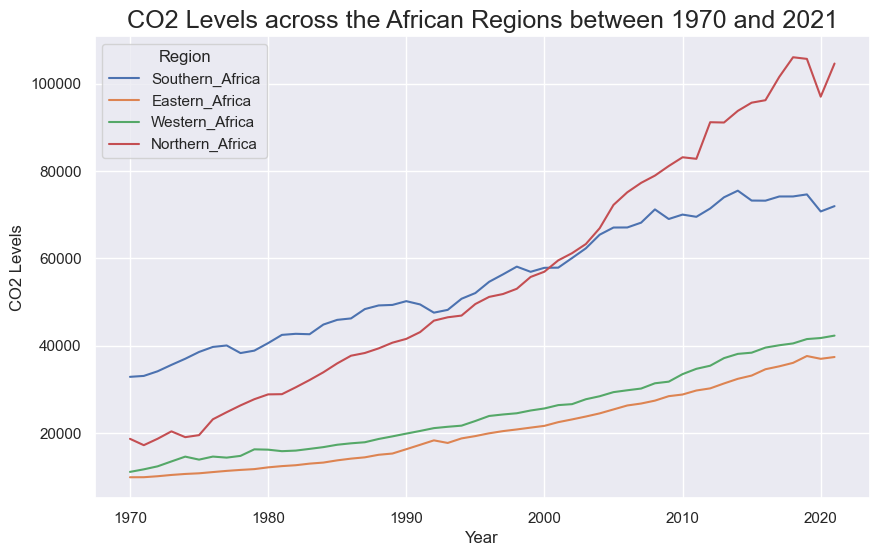

In [24]:
# line plot of CO2 vs. Year in each Region to show the trend of CO2 levels by year

sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=totals_by_country_africa, x='Year', y='CO2', hue='Region', ci=None)

plt.title('CO2 Levels across the African Regions between 1970 and 2021', fontsize=18) 
plt.yticks(range(20000, 120000, 20000))
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.legend(title='Region')

plt.show()


In [25]:
# Uncomment and run to view solution two
# print(inspect.getsource(solutions.solution_two))

## Instruction 3: Determine the relationship between time (`Year`) and `CO2` levels across the African regions


### Tasks

- Using the `totals_by_country_africa` dataset, conduct a Spearman's correlation to determine the relationship between time (`Year`) and `CO2` within each African `Region`.
- Save the results in a variable called `relationship_btw_time_CO2`.


### Hints
- Use `df.groupby()` and `df.corr()` methods. 
- Use the `corr()` method's `method` parameter to set the correlation type.

In [26]:
# calculate Spearman's correlation for each African region
relationship_btw_time_CO2 = totals_by_country_africa.groupby('Region')[['Year', 'CO2']].corr(method='spearman')

print(relationship_btw_time_CO2)


                          Year       CO2
Region                                  
Eastern_Africa  Year  1.000000  0.181768
                CO2   0.181768  1.000000
Northern_Africa Year  1.000000  0.429875
                CO2   0.429875  1.000000
Southern_Africa Year  1.000000  0.260986
                CO2   0.260986  1.000000
Western_Africa  Year  1.000000  0.324071
                CO2   0.324071  1.000000


In [27]:
# checking the columns

relationship_btw_time_CO2.columns

Index(['Year', 'CO2'], dtype='object')

In [28]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_3(relationship_btw_time_CO2)

In [29]:
# Uncomment and run to view solution three
# print(inspect.getsource(solutions.solution_three))

## Instruction 4: Determine if there is a significant difference in the CO2 levels among the African Regions

### Tasks

- Using `totals_by_country_africa`, conduct an ANOVA using `pingouin.anova()` on the `CO2` by `Region`. Save the results as `aov_results`.
- Conduct a posthoc test (with Bonferroni correction) using `pingouin.pairwise_tests()` to find the source of the significant difference. Save the results as `pw_ttest_result`.
- Is it true that the `CO2` levels of the `Southern_Africa` and `Northern_Africa` region do not differ significantly? The previous task should provide you with the answer.

In [30]:
# conduct an ANOVA using pingouin.anova() on the CO2 by Region

aov_results = pingouin.anova(data=totals_by_country_africa, dv='CO2', between='Region')
print(aov_results)

   Source  ddof1  ddof2          F         p-unc       np2
0  Region      3   2908  35.558065  1.455509e-22  0.035385


In [31]:
# conduct a posthoc test (with Bonferroni correction) using pingouin.pairwise_tests() to find the source of the significant difference

pw_ttest_result = pingouin.pairwise_tests(
    data=totals_by_country_africa, dv='CO2', between='Region', padjust='bonf'
)
print(pw_ttest_result)

  Contrast                A                B  ...  p-adjust       BF10    hedges
0   Region   Eastern_Africa  Northern_Africa  ...      bonf  1.554e+17 -0.801390
1   Region   Eastern_Africa  Southern_Africa  ...      bonf  4.024e+08 -0.421846
2   Region   Eastern_Africa   Western_Africa  ...      bonf      0.173 -0.059094
3   Region  Northern_Africa  Southern_Africa  ...      bonf      0.079  0.004785
4   Region  Northern_Africa   Western_Africa  ...      bonf  9.641e+10  0.418029
5   Region  Southern_Africa   Western_Africa  ...      bonf  5.437e+05  0.335300

[6 rows x 13 columns]


In [32]:
# check if CO2 levels of the Southern_Africa and Northern_Africa region do not differ significantly

significance_level = 0.05

p_corr = pw_ttest_result[(pw_ttest_result['A'] == 'Northern_Africa') & (pw_ttest_result['B'] == 'Southern_Africa')]['p-corr']
p_corr = p_corr.values[0]


if p_corr < significance_level:
    print("There is a significant difference in CO2 levels between Southern_Africa and Northern_Africa.")
else:
    print("The CO2 levels of Southern_Africa and Northern_Africa do not differ significantly.")

The CO2 levels of Southern_Africa and Northern_Africa do not differ significantly.


In [33]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_4(aov_results, pw_ttest_result)

In [34]:
# Uncomment and run to view solution four
# print(inspect.getsource(solutions.solution_four))

## Instruction 5: Determine the most common (top 5) industries in each African region.

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Count the occurrences of each `Industry` within each `Region` and name it `Count`.
- Sort the data within each region group by `Count` in descending order
- Get the top 5 industries for each region
- save it to variable `top_5_industries` for each region.

### Hints

- You can use the `df.groupby()` method to group the data by multiple columns.
- The `df.value_counts()` function can be useful for counting occurrences.
- The `df.sort_values` function can help you with sorting.

In [35]:
# group the ipcc_2006_africa data by Region and Industry, and count the occurrences
ind_by_region = ipcc_2006_africa.groupby(['Region', 'Industry']).size().reset_index(name='Count')

# find the index of the industry with the highest count within each region
idx = ind_by_region.groupby('Region')['Count'].idxmax()

# select the rows corresponding to the industry with the highest count
top_industries_by_region = ind_by_region.loc[idx]

# display the result
print(top_industries_by_region)


             Region                       Industry  Count
18   Eastern_Africa  Residential and other sectors   1454
41  Northern_Africa  Residential and other sectors    572
64  Southern_Africa  Residential and other sectors   1144
87   Western_Africa  Residential and other sectors   2541


In [36]:
# Uncomment and run to view solution five
# print(inspect.getsource(solutions.solution_five))

## Instruction 6: Determine the industry responsible for the most amount of CO2 (on average) in each African Region

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Calculate the average `CO2` emissions for each group.
- Find the `Industry` with the maximum average `CO2` emissions in each region.

### Hints
- You can use the `df.groupby()` method to group the data by `Region` and `Industry`.
- The `df.mean()` function can be used to calculate the average CO2 emissions for each group.
- The `df.idxmax()` function can help you find the index of the row with the maximum average CO2 emissions within each region group.
- You can use the `df.loc[]` method to select the rows corresponding to the indices found in step 3.

In [37]:
# group the ipcc_2006_africa data by Region and Industry, and calculate average CO2 emission for each group
# rename new column as 'avg_CO2'
avg_CO2 = ipcc_2006_africa.groupby(['Region', 'Industry'])['CO2'].mean().reset_index(name='CO2')

# further group the 'avg_CO2' df to find the maximum CO2 emission by Region and Industry
top_idx = avg_CO2.groupby('Region')['CO2'].idxmax()

# return a dataframe 'max_co2_industries' containing Industry with the maximum average CO2 emissions in each Region
max_co2_industries = avg_CO2.loc[top_idx]
max_co2_industries

,Region,Industry,CO2
18,Eastern_Africa,Residential and other sectors,7904.439282
31,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
54,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
87,Western_Africa,Residential and other sectors,8702.936136


In [38]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_6(max_co2_industries)

In [39]:
# Uncomment and run to view solution six
# print(inspect.getsource(solutions.solution_six))

## Instruction 7: Predict the `CO2` levels (at each African region) in the year 2025

### Tasks

- Create an instance of `LinearRegression()` and save it as `reg`.
- Fit a linear model of `CO2` (in log base 10) by `Year` and `Region` using `reg.fit()`.
- Predict the values of `CO2` using the `reg.predict()` and the data provided. Save the result as `predicted_co2`. 
- Convert `predicted_co2` values from log base 10 to decimals and round to 2 d.p using `np.round()`.


### Hints

- Use `pd.get_dummies()` on the features to one-hot-encode the `Region` column before fitting the model.
- If `Y = np.log10(X)`, then `X = 10**Y`.

In [40]:
# data for model

data = totals_by_country_africa[['Year', 'Region', 'CO2']]
data.shape

(2912, 3)

In [41]:
# data preprocessing

data.isna().sum()

Year      0
Region    0
CO2       0
dtype: int64

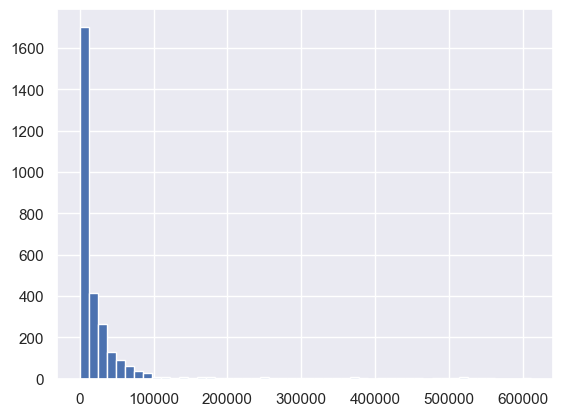

In [42]:
# checking the shape of the data

data['CO2'].hist(bins=50)
plt.show()

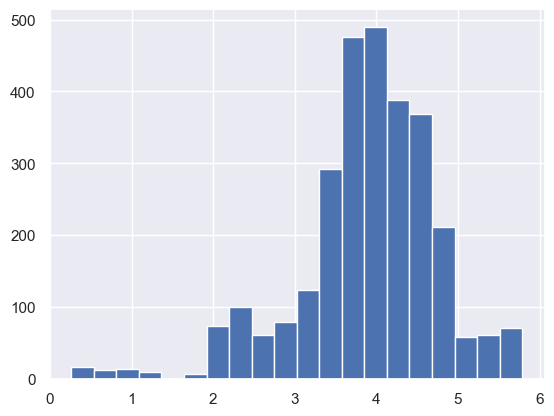

In [43]:
# applying log base 10 transformation to the 'CO2' column
data['CO2'] = np.log10(data['CO2'])

data['CO2'].hist(bins=20)
plt.show()

In [44]:
# perform one-hot encoding for Region variable

data = pd.get_dummies(data)
data.head()

,Year,CO2,Region_Eastern_Africa,Region_Northern_Africa,Region_Southern_Africa,Region_Western_Africa
0,1970,4.309487,0,0,1,0
1,1970,3.642025,1,0,0,0
2,1970,3.635362,0,0,0,1
3,1970,3.911589,0,0,0,1
4,1970,2.976463,0,0,1,0


In [45]:
data.shape

(2912, 6)

In [46]:
# import cross_val_score, KFold
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# initialize the linear model
reg = LinearRegression()

# assigning data variables
X = data.drop('CO2', axis=1).values
y = data['CO2'].values

# fit the data based on instruction given
reg.fit(X, y)

LinearRegression()

In [47]:
# check

X

array([[1970,    0,    0,    1,    0],
       [1970,    1,    0,    0,    0],
       [1970,    0,    0,    0,    1],
       ...,
       [2021,    0,    0,    1,    0],
       [2021,    0,    0,    1,    0],
       [2021,    0,    0,    1,    0]])

In [48]:
# check

y

array([4.30948696, 3.64202532, 3.63536177, ..., 5.68681459, 4.56811627,
       4.68758215])

In [50]:
# data provided for you
newdata = pd.DataFrame({ 'Year': 2025, 'Region': african_regions })
newdata = pd.get_dummies(newdata)

In [51]:
# checking the data for predictions

display(newdata)
print(f'\n {newdata.shape}')


,Year,Region_Eastern_Africa,Region_Northern_Africa,Region_Southern_Africa,Region_Western_Africa
0,2025,1,0,0,0
1,2025,0,0,0,1
2,2025,0,0,1,0
3,2025,0,1,0,0



 (4, 5)


In [52]:
# data for prediction
newdata = newdata.values

# predict CO2 values over newdata 
predicted_co2 = reg.predict(newdata)

In [53]:
# return CO2 values to decimal
predicted_co2 = 10 ** (predicted_co2)

# round the decimal values to 2 decimal places
predicted_co2 = np.round(predicted_co2, 2)

# print the rounded values
print(predicted_co2)

[15177.72 10788.07 37761.69 41081.9 ]


In [54]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_7(predicted_co2)

In [55]:
# Uncomment and run to view solution seven
# print(inspect.getsource(solutions.solution_seven))

## Instruction 8: Determine if CO2 levels affect annual temperature in the selected African countries

![relationship between co2 and temp](co2_temp.png)


### Tasks

- Select `Name`, `Year` and `CO2` of countries `countries`. Save the result as `selected_countries`.
- Convert `temperatures` dataset from wide to long format. Set the new column names to `Name` and `Temperature`. Save the result as `temp_long`.
- Perform an inner join between `selected_countries` and `temp_long` on `Name` and `Year`. Save the result as `joined`.
- Create a linear model of `Temperature` by `CO2` and `Name`. Save the result as `model_temp`. *The code has been added for you.*
- A one unit rise in log10 `CO2` leads to how many degrees rise in temperature? Run `model_temp.summary()` to find out!
- What is the adjusted R squared value of the model?

### Hints

- `df.melt()` converts a dataset from wide to long.
- `pd.merge()` can be used to perform all kinds of joins.

In [56]:
# check temperature dataset

print(temperatures.head())
print(temperatures.shape)

   Year  Ethiopia  Mozambique  Nigeria  Tunisia
0  1960     22.59       23.82    26.87    19.78
1  1961     22.30       24.00    26.28    19.67
2  1962     22.36       23.77    26.68    19.37
3  1963     22.56       23.27    27.02    19.33
4  1964     22.15       23.47    26.66    19.41
(62, 5)


In [57]:
totals_by_country_africa.head()

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,1970,20393.274068
1,Eastern_Africa,BDI,Burundi,1970,4385.562636
2,Western_Africa,BEN,Benin,1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,1970,8158.106987
4,Southern_Africa,BWA,Botswana,1970,947.246888


In [61]:
# list of selected countries
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]

# select Name, Year and CO2 of countries
selected_countries = totals_by_country_africa[totals_by_country_africa['Name'].isin(countries)]
selected_countries = selected_countries[['Name', 'Year', 'CO2']]
selected_countries.reset_index(drop=True, inplace=True)

# melt temperature dataframe and rename columns
temp_long = pd.melt(temperatures, id_vars='Year').rename(columns = {'variable':'Name', 'value':'Temperature'})

# perform an inner join between selected_countries and temp_long on Name and Year
joined = pd.merge(selected_countries, temp_long, on=['Name', 'Year'], how='inner')

# Provided for you
# Uncomment and run to complete this task
model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.22e-182
Time:                        04:23:19   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# DO NOT MODIFY THIS CELL
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_8(joined, model_temp)

In [39]:
# Uncomment and run to view solution eight
# print(inspect.getsource(solutions.solution_eight))

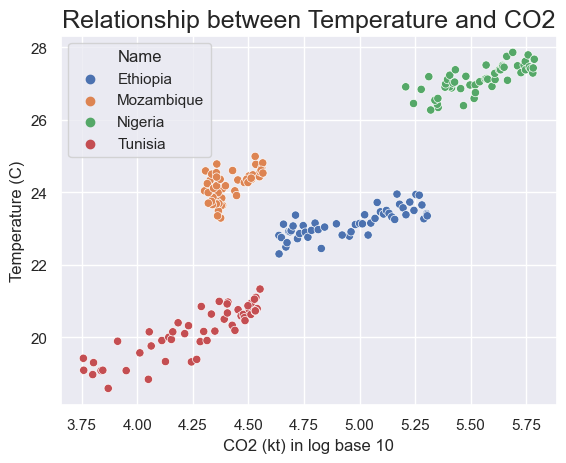

In [63]:
# bonus
# scatterplot showing Relationship between Temperature and CO2
#set style
sns.set(style='darkgrid')

# perform log(base 10) of CO2 values
joined['log_CO2'] = np.log10(joined['CO2'])

# create the scatterplot
sns.scatterplot(x='log_CO2', y='Temperature', hue='Name', data=joined)

# set scatterplot details
plt.title('Relationship between Temperature and CO2', fontsize=18)
plt.xlabel('CO2 (kt) in log base 10')
plt.ylabel('Temperature (C)')

# display the plot
plt.show()